# Load the batting data first

In [161]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
import scipy, scipy.stats



bat_data = pd.read_csv('C:/Users/John/Desktop/Udacity_data_scientist_nanodegree/P2/Assignment/baseballdatabank-master/Batting.csv')


In [125]:
print(bat_data.head()) # to quickly check the data

    playerID  yearID  stint teamID lgID   G     AB     R     H    2B  ...   \
0  abercda01    1871      1    TRO  NaN   1    4.0   0.0   0.0   0.0  ...    
1   addybo01    1871      1    RC1  NaN  25  118.0  30.0  32.0   6.0  ...    
2  allisar01    1871      1    CL1  NaN  29  137.0  28.0  40.0   4.0  ...    
3  allisdo01    1871      1    WS3  NaN  27  133.0  28.0  44.0  10.0  ...    
4  ansonca01    1871      1    RC1  NaN  25  120.0  29.0  39.0  11.0  ...    

    RBI   SB   CS   BB   SO  IBB  HBP  SH  SF  GIDP  
0   0.0  0.0  0.0  0.0  0.0  NaN  NaN NaN NaN   NaN  
1  13.0  8.0  1.0  4.0  0.0  NaN  NaN NaN NaN   NaN  
2  19.0  3.0  1.0  2.0  5.0  NaN  NaN NaN NaN   NaN  
3  27.0  1.0  1.0  0.0  2.0  NaN  NaN NaN NaN   NaN  
4  16.0  6.0  2.0  2.0  1.0  NaN  NaN NaN NaN   NaN  

[5 rows x 22 columns]


# Part 1 - exploratory data analysis

# Correlation between Games played (G) and the good attributes

Since the data size is very big, I will restrict my analysis on most recent year (2015) only for as a start.

## Hypotheses

H0: AB is not linearly correlated with G; rho = 0

H1: AB is linearly correlated with G; rho > 0 or rho < 0

Similarly, other variables have similar hypotheses

Populating the interactive namespace from numpy and matplotlib


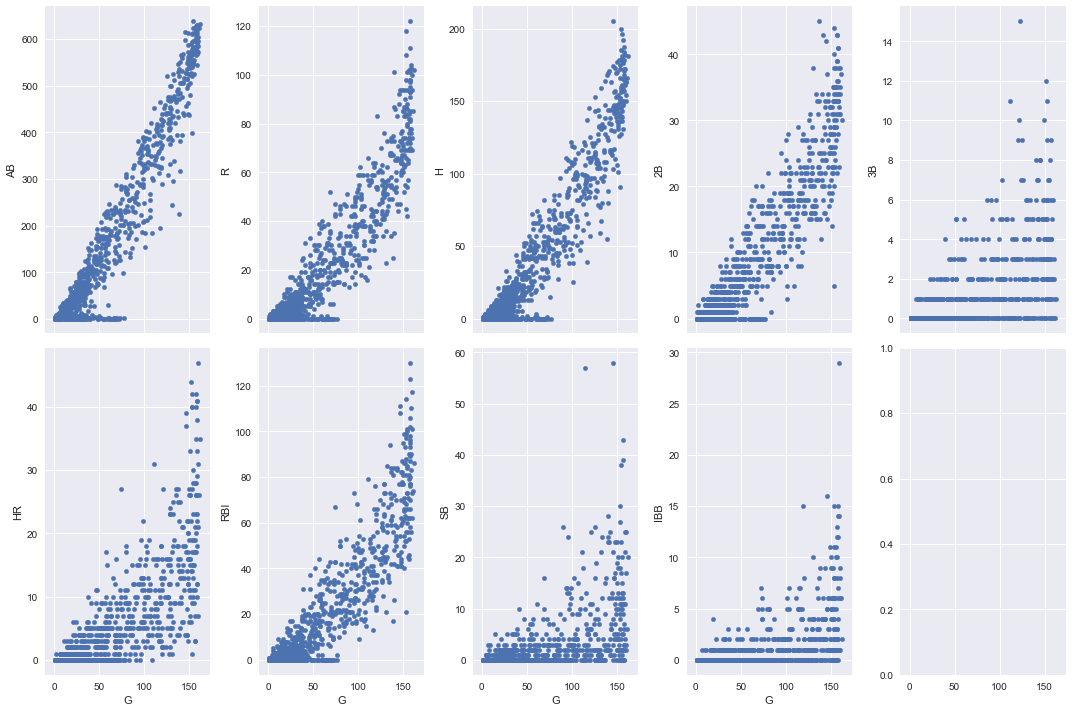

In [129]:
bat_2015_data = bat_data[bat_data['yearID'] == 2015]

%pylab inline

figG1, Gaxes = plt.subplots(nrows=2, ncols=5, sharex = True, figsize = (15,10))

# plotting scatter plots with G versus 'good attributes (R, H, 2B, 3B, HR, RBI, SB and IBB)'

bat_2015_data.plot(x = 'G', y = 'AB', kind = 'scatter', ax=Gaxes[0,0])
bat_2015_data.plot(x = 'G', y = 'R', kind = 'scatter', ax=Gaxes[0,1])
bat_2015_data.plot(x = 'G', y = 'H', kind = 'scatter', ax=Gaxes[0,2])
bat_2015_data.plot(x = 'G', y = '2B', kind = 'scatter', ax=Gaxes[0,3])
bat_2015_data.plot(x = 'G', y = '3B', kind = 'scatter', ax=Gaxes[0,4])

bat_2015_data.plot(x = 'G', y = 'HR', kind = 'scatter', ax=Gaxes[1,0])
bat_2015_data.plot(x = 'G', y = 'RBI', kind = 'scatter', ax=Gaxes[1,1])
bat_2015_data.plot(x = 'G', y = 'SB', kind = 'scatter', ax=Gaxes[1,2])
bat_2015_data.plot(x = 'G', y = 'IBB', kind = 'scatter', ax=Gaxes[1,3])




figG1.tight_layout()

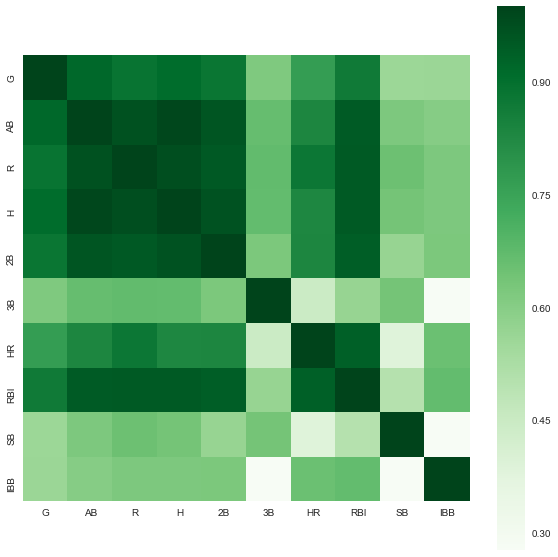

In [78]:
# plot G and good attribute correlation

bat_G_corr = bat_2015_data[['G','AB','R','H','2B','3B','HR','RBI','SB','IBB']].corr()

figGCorr, ax = plt.subplots(figsize=(10, 10))

if False:
    ax.matshow(bat_corr)
    plt.xticks(range(len(bat_G_corr.columns)), bat_G_corr.columns);
    plt.yticks(range(len(bat_G_corr.columns)), bat_G_corr.columns);

if True: 
    #cmap = sns.color_palette('Blues')
    #g = sns.clustermap(bat_corr) # sns method
    sns.heatmap(bat_G_corr, mask=np.zeros_like(bat_G_corr, dtype=np.bool), cmap='Greens', \
                square=True, ax=ax)
    
    #sns.heatmap(bat_G_corr, mask=np.zeros_like(bat_G_corr, dtype=np.bool), cmap=sns.diverging_palette(220, 30, as_cmap=True), \
    #            square=True, ax=ax)
    
    # http://seaborn.pydata.org/tutorial/color_palettes.html

## Observation
From this correlation matrix, it can be observed that AB, R, H, 2B, HR and RBI have strong correlation with games played. This is reasonable because the more one plays, the more likely he will have more chance to swing the bat and hit the ball, given that players have consistent hitting rate. 

Interestingly, some other variables have shown only weak correlation with games played. These are 3B, HR, SB and IBB. A quick glance at the definitionof the terms gave me a impression that these things happen much less than the other variables. And indeed, the frequencies for these variables are lower than the variables highly correlated to the G. It can be observed that a significant number of players who have attended a lot of games only had low numbers in these moderately correlated variables. However, few players who have achieved high values in these variables have almost always attended large numbers of games. Therefore, I suppose that these variables have much smaller occurances and in a lot of occasions, they depend not just on players abilities but other external factors that it cannot be accurately predicted by G in a linear model. For example, it depends on the pitcher and fielder to communicate to avoid a SB. So a good batter may be a good at stealing bases, but the chance may never occur if the defending team shows no error. 

One more interesting finding is that there are quite a few players who attended many games but have zero AB. Further analysis will be carried out to answer the question (Part 2)

Note that there are about 10 data points that have high G and high dependent variable values. These players may be the star players and they participate lots of games while achieving results that surpass the linear pattern.



## Correlation between Games played (G) and the bad attributes

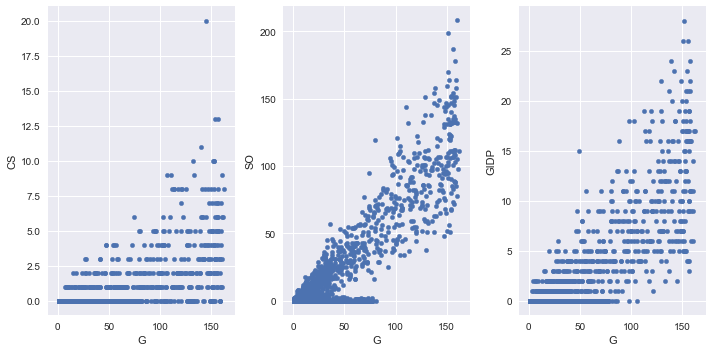

In [47]:
figG2, Naxes = plt.subplots(nrows=1, ncols=3, sharex = True, figsize = (10,5))

# plotting scatter plots with G versus 'bad attributes (CS, SO and GIDP)'

bat_2015_data.plot(x = 'G', y = 'CS', kind = 'scatter', ax=Naxes[0])
bat_2015_data.plot(x = 'G', y = 'SO', kind = 'scatter', ax=Naxes[1])
bat_2015_data.plot(x = 'G', y = 'GIDP', kind = 'scatter', ax=Naxes[2])

figG2.tight_layout()


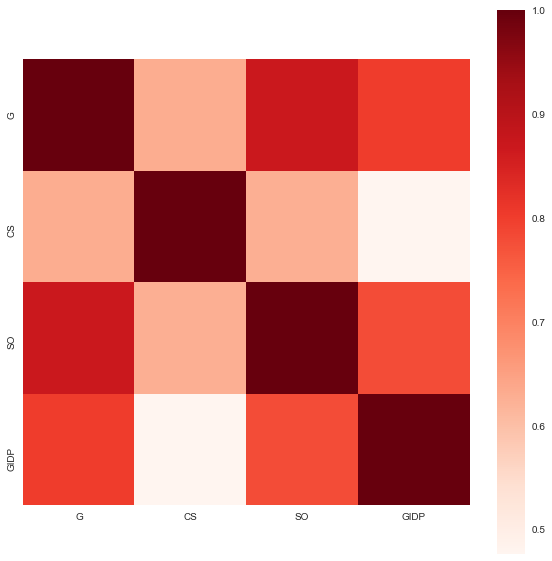

In [79]:
# plot G and bad variables correlation

bat_N_corr = bat_2015_data[['G','CS', 'SO', 'GIDP']].corr()

figBCorr, ax = plt.subplots(figsize=(10, 10))

if True: 
    #cmap = sns.color_palette('Blues')
    #g = sns.clustermap(bat_N_corr) # sns method
    sns.heatmap(bat_N_corr, mask=np.zeros_like(bat_N_corr, dtype=np.bool), cmap='Reds', \
                square=True, ax=ax)
    
    #sns.heatmap(bat_N_corr, mask=np.zeros_like(bat_N_corr, dtype=np.bool), cmap=sns.diverging_palette(220, 30, as_cmap=True), \
    #            square=True, ax=ax)
    
    # http://seaborn.pydata.org/tutorial/color_palettes.html

G and CS: There is only a weak correlation between "games played" and "caught stealing". Again, this can be attributed to the fact the frequency of CS is small (compared to strikeout), and many players who bat do not get caught (very likely that they do not do so, which is a plausible assumption because "stealing base" has low frequency as well).

G and SO: These is a strong correlation between "game played" and "strike out" and this is reasonable since the more games played, the larger the number of strikes a batter will receive given that everyone has to either move on to the next base or get a strike. 

G and GIDP: There is a medium correlation between "game played" and "grounded into double plays". GIPD is a less likely even, but it still occurs every now and then, so the more a batter plays, the more likely he will get GIPD.

## Correlation between Games played (G) and the pitcher's fault and sacrifice

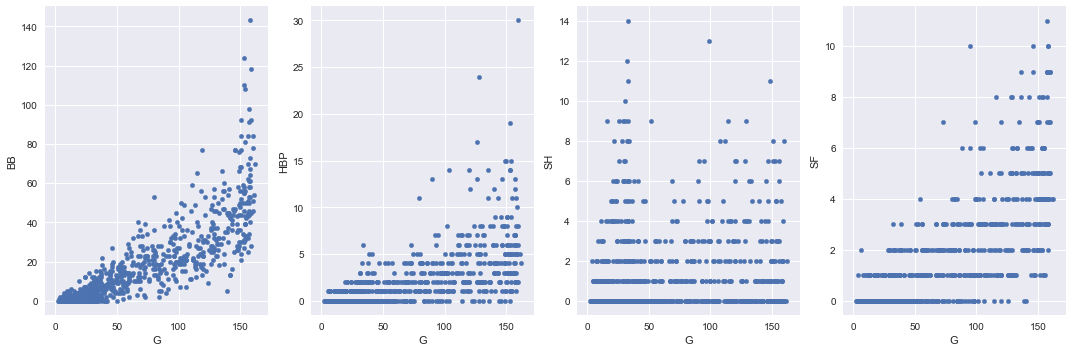

In [141]:
figG3, Baxes = plt.subplots(nrows=1, ncols=4, sharex = True, figsize = (15,5))

# plotting scatter plots with G versus 'pitcher's fault (BB and HBP)' and 'sacrifice (SH and SF)'

bat_2015_data.plot(x = 'G', y = 'BB', kind = 'scatter', ax=Baxes[0])
bat_2015_data.plot(x = 'G', y = 'HBP', kind = 'scatter', ax=Baxes[1])
bat_2015_data.plot(x = 'G', y = 'SH', kind = 'scatter', ax=Baxes[2])
bat_2015_data.plot(x = 'G', y = 'SF', kind = 'scatter', ax=Baxes[3])

figG3.tight_layout()

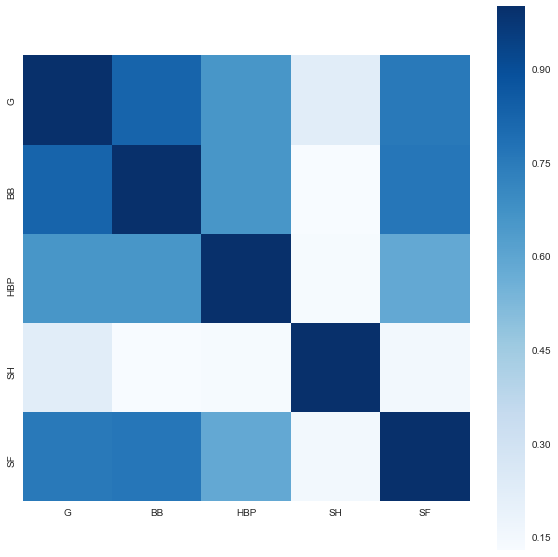

In [80]:
# plot G and pitcher's fault and sacrifice variables correlation

bat_P_corr = bat_2015_data[['G','BB', 'HBP', 'SH', 'SF']].corr()

figPCorr, ax = plt.subplots(figsize=(10, 10))

if True: 
    #cmap = sns.color_palette('Blues')
    #g = sns.clustermap(bat_N_corr) # sns method
    sns.heatmap(bat_P_corr, mask=np.zeros_like(bat_P_corr, dtype=np.bool), cmap='Blues', \
                square=True, ax=ax)
    
    #sns.heatmap(bat_N_corr, mask=np.zeros_like(bat_N_corr, dtype=np.bool), cmap=sns.diverging_palette(220, 30, as_cmap=True), \
    #            square=True, ax=ax)
    
    # http://seaborn.pydata.org/tutorial/color_palettes.html

G and BB: There is a strong correlation between "the number of games played" and "Base on balls". BB also happens often and the main determinant of BB is on the pitcher, not the batter. As pitchers have a certain rate of pitching 4 bad balls, the more a batter plays, the more BBs he would get. Again, some high G data points have super-linearly high BB as well. It may mean that pitchers are aware of good batters and may try to pitch the ball into difficult angles, which may add up to the BB probability when pitching good players.


G and HBP: There is a medium correlation between "number of games played" and "hit by pitch". this frequency of this variable is again small. The probability of this happening is small, but since the probability usually does not get affected significantly, the more games a player plays, the more liklely he will get a HBP.

G and SH: There is no correlation between "the number of games played" and "sacrifice hits". Interestingly, most other variables, if they have low frequencies, there are still linear patterns because it is unusual to have high dependent varaible values with low number of games played, if the event has a low probability and occurs randomly. SH, however, has comparable values with low G and high G does not necessarily correspond to high SH. This can be explained by the fact that SH is something that one decides to do, rather than a random process. Furthermore, a person who executes this manoeuvre may be considered a less competitive batter, so his games played might not be high (some of the batters with high SH had more than half their games doing SH). Note the frequency of SH is low, this may be because a SH is inviting a GIDP, so it is not widely used unless in dire situations (for example, just need 1 point to win and a player is close to the home base).

G and SF: there is a strong correlation between "number of games played" and "sacrifice flies". I assume that sacrifice flies might not be what a batter initially intended to do, because if one player can hit a fly ball, he should be able to hit a good flying ball that hits the ground as well. So I think this manoeuvre is probably not purely an intentional one (or is hard to execute) like SH. Therefore, like many variables, the more games one plays, the more likely he can get a SF.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


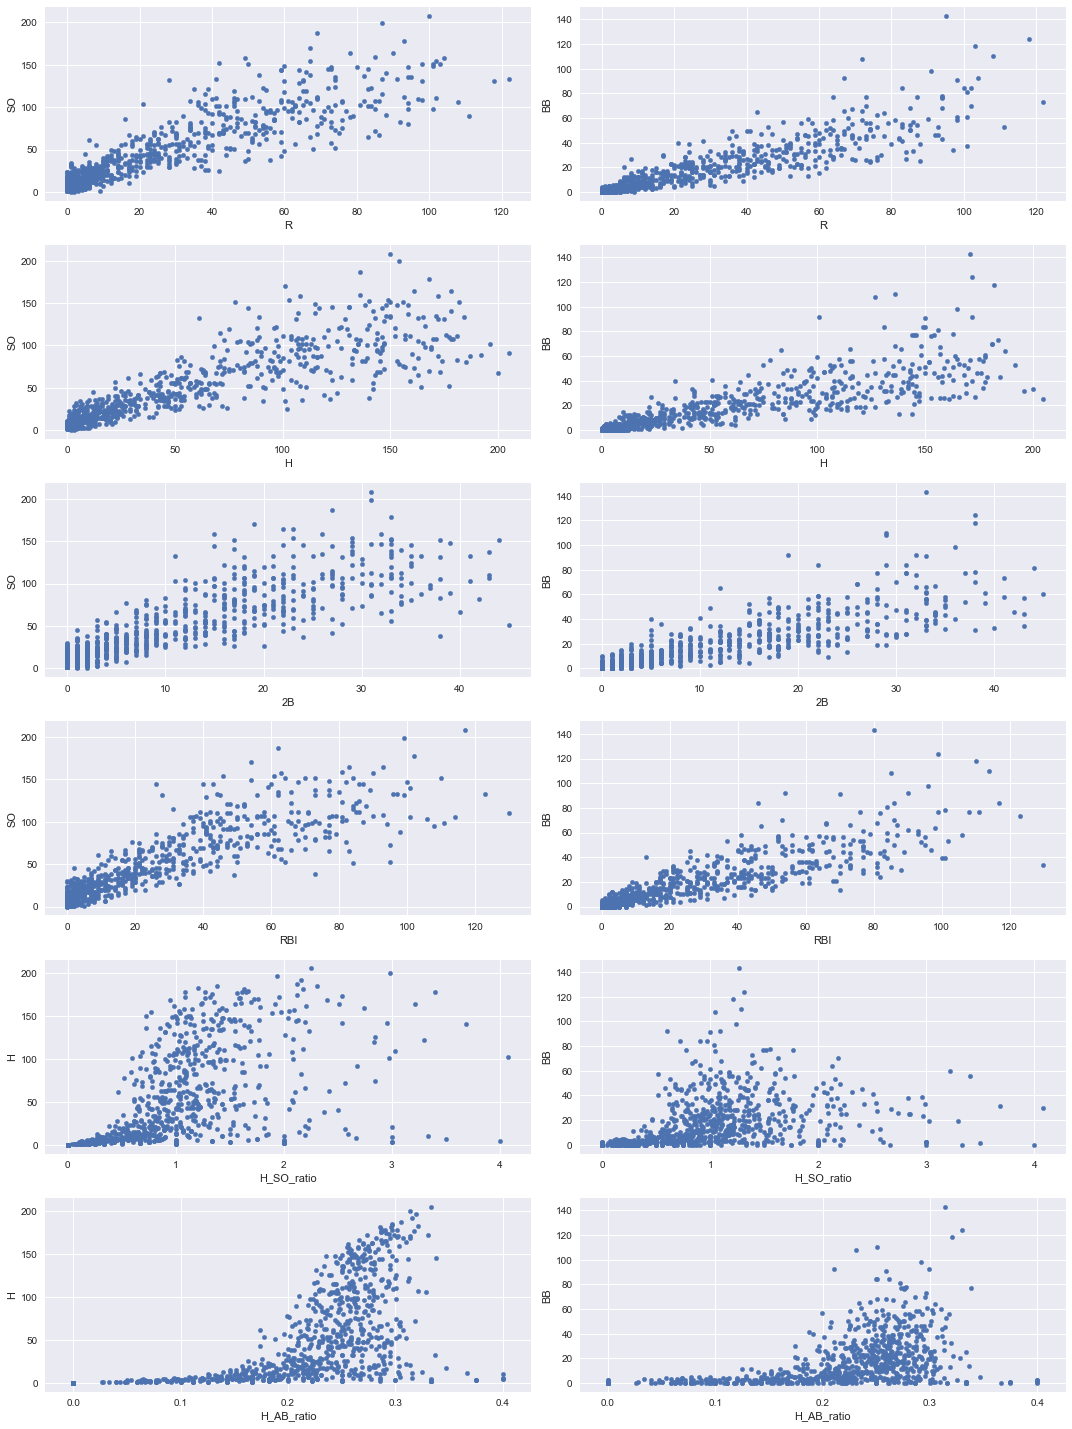

In [143]:
# Trying to figure out the relationship between hit and strike out, and hit and BB

figS4, Saxes = plt.subplots(nrows=6, ncols=2, sharex = False, figsize = (15,20))

# introduce a new variable = hit / strikeout (hit-SO ratio)

bat_2015_data['H_SO_ratio'] = bat_2015_data['H']/bat_2015_data['SO']

bat_2015_data['H_AB_ratio'] = bat_2015_data['H']/bat_2015_data['AB']

# plotting scatter plots with Hit versus 'Strikeouts (SO)' and 'Base on Balls (BB)'

bat_2015_data.plot(x = 'R', y = 'SO', kind = 'scatter', ax=Saxes[0,0])
bat_2015_data.plot(x = 'R', y = 'BB', kind = 'scatter', ax=Saxes[0,1])

bat_2015_data.plot(x = 'H', y = 'SO', kind = 'scatter', ax=Saxes[1,0])
bat_2015_data.plot(x = 'H', y = 'BB', kind = 'scatter', ax=Saxes[1,1])

bat_2015_data.plot(x = '2B', y = 'SO', kind = 'scatter', ax=Saxes[2,0])
bat_2015_data.plot(x = '2B', y = 'BB', kind = 'scatter', ax=Saxes[2,1])


bat_2015_data.plot(x = 'RBI', y = 'SO', kind = 'scatter', ax=Saxes[3,0])
bat_2015_data.plot(x = 'RBI', y = 'BB', kind = 'scatter', ax=Saxes[3,1])

bat_2015_data.plot(x = 'H_SO_ratio', y = 'H', kind = 'scatter', ax=Saxes[4,0])
bat_2015_data.plot(x = 'H_SO_ratio', y = 'BB', kind = 'scatter', ax=Saxes[4,1])

bat_2015_data.plot(x = 'H_AB_ratio', y = 'H', kind = 'scatter', ax=Saxes[5,0])
bat_2015_data.plot(x = 'H_AB_ratio', y = 'BB', kind = 'scatter', ax=Saxes[5,1])


figS4.tight_layout()

## Part 2. Categorising batters into different category
I will set some criteria to divide the players into super-star (top 5%), elite (top 25% - 5%) average (50% - 75%), mediocre (25% - 50%) and lousy (0% - 25%) players and then compare their other attributes. 

I first look at the Hit over At Bat ratio and Hit

51.220462850182706
0.21609742002469712
0.25      6.0
0.50     27.0
0.75     89.0
0.95    160.0
Name: H, dtype: float64
0.25    0.176471
0.50    0.235988
0.75    0.269682
0.95    0.311688
Name: H_AB_ratio, dtype: float64


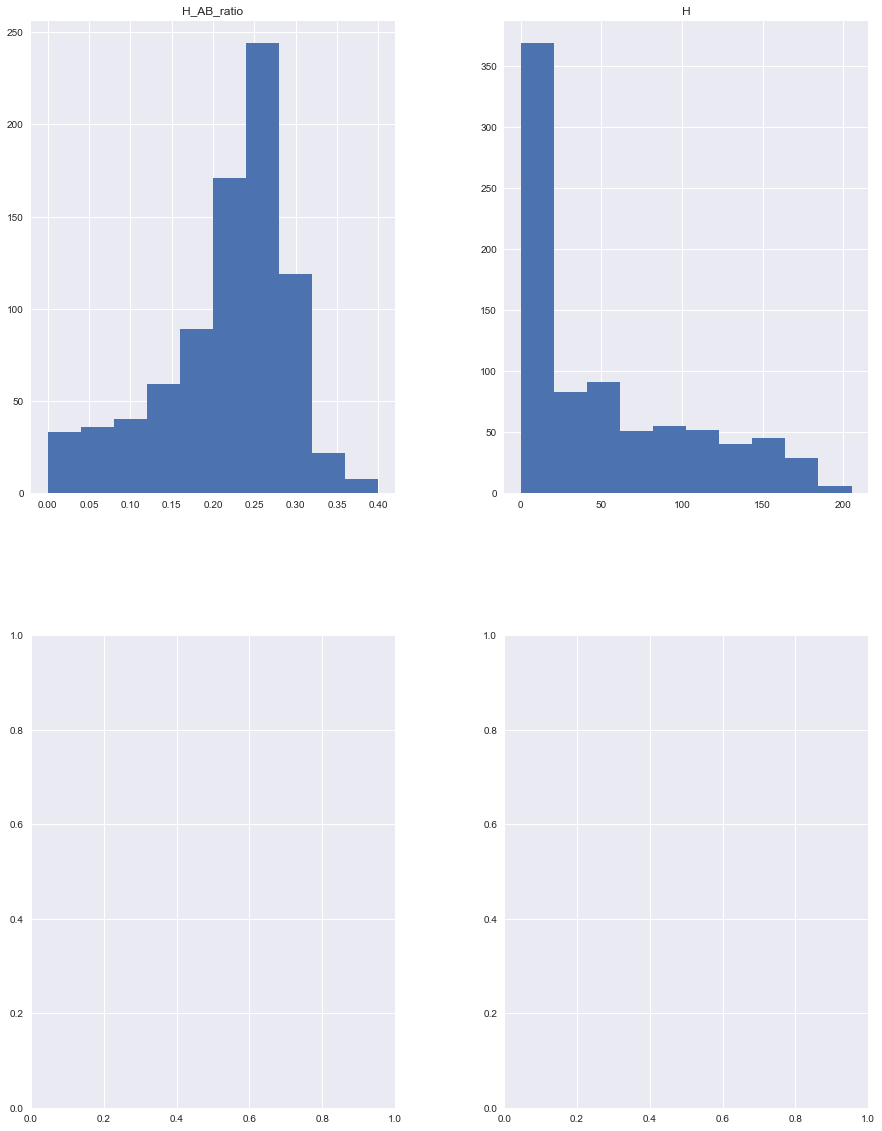

In [160]:
fig5, BinAxes = plt.subplots(nrows=2, ncols=2, sharex = False, figsize = (15,20))

bat_2015_data.hist(column = 'H_AB_ratio', ax=BinAxes[0,0])
bat_2015_data.hist(column = 'H', ax=BinAxes[0,1])

print(bat_2015_data['H'].mean())
print(bat_2015_data['H_AB_ratio'].mean())


print(bat_2015_data['H'].quantile([.25, .5, .75, .95]))
print(bat_2015_data['H_AB_ratio'].quantile([.25, .5, .75, .95]))

# A player must satisfy both criteria in order to be categorised into the specific groups. For example, 
# if a player has H_AB_ratio of 0.35 (top 5%), but a H of 25 (bottom 50%), he is still considered as a mediocre player.